In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import enum
import attrdict
import pprint
import itertools

In [4]:
# basic use of norm the calculate the length of each of the 3 vectors
others = np.array([[1,0,0],[0,2,0],[1,0,0]])
np.linalg.norm(others, axis=1)

array([1., 2., 1.])

In [9]:
# getting the L^2 (Euclidean) distance of points from player
others = np.array([[1,0,0],[0,2,0],[1,0,0],[0,-1,0]])
player = np.array([0,1,0])
np.linalg.norm(others - player, axis=1)

array([1.41421356, 1.        , 1.41421356, 2.        ])

In [14]:
# getting the L^2 (Euclidean) distance of points from player
# can use distance vector to filter arrays
ids = np.array([1,2,3,4])
others = np.array([[1,0,0],[0,2,0],[1,0,0],[0,-1,0]])
player = np.array([0,1,0])
dist = np.linalg.norm(others - player, axis=1)
ids[dist < 2.].tolist()

array([ True,  True,  True, False])

In [25]:
# How to preallocate a vector?
# This is faster than list.append()
v = [None] * 5
print(v)
for i in range(5):
    v[i] = i

[None, None, None, None, None]


[0, 1, 2, 3, 4]

In [28]:
# How does a vector subtract a matrix?
others = np.array([[[1,0,0],[0,2,0]],[[1,0,0],[0,-1,0]]])
player = np.array([0,1,0])
others - player

array([[[ 1, -1,  0],
        [ 0,  1,  0]],

       [[ 1, -1,  0],
        [ 0, -2,  0]]])

In [36]:
n_missing = 3
faraway = np.array([1,2,3]) + 500
faraway_tile = np.tile(faraway[None, None], (n_missing, 6, 1))
# faraway_tile = np.tile(faraway, (n_missing, 6, 1))
faraway_tile

array([[[501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503]],

       [[501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503]],

       [[501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503],
        [501, 502, 503]]])

In [20]:
# getting the L^2 (Euclidean) distance of points from player
# can use distance vector to filter arrays
ids = np.array([1,2,3,4,5])
others = np.array([[1,0,1],[1,0,0],[0,2,0],[2,2,1],[0,-1,0]])
player = np.array([0,1,0])
dist = np.linalg.norm(others - player, axis=1)
# ids[dist < 2.].tolist()
dd = pd.DataFrame({
        'ids': ids,
        'dist': dist})
print(dd)
dd = dd[dd['dist'] < 2.0]
print(dd)
dd.sort_values('dist', inplace=True)
print(dd)
dd['ids'].to_numpy()

   ids      dist
0    1  1.732051
1    2  1.414214
2    3  1.000000
3    4  2.449490
4    5  2.000000
   ids      dist
0    1  1.732051
1    2  1.414214
2    3  1.000000
   ids      dist
2    3  1.000000
1    2  1.414214
0    1  1.732051


array([3, 2, 1])

In [9]:
# don't use enum.Enum, just use object. It works better
class ScenarioLabel(object):
    NONE = 'NONE'
    UNCONTROLLED = 'UNCONTROLLED'
    CONTROLLED = 'CONTROLLED'

print(ScenarioLabel.CONTROLLED)
# don't need .name to get string
# print(ScenarioLabel.CONTROLLED.name)

CONTROLLED


In [10]:
# iterate through the rows in an array
# but not the columns
locations = np.array([[1,0,0],[0,2,0],[1,0,0],[0,-1,0]])
for loc in locations:
    print(loc)

[1 0 0]
[0 2 0]
[1 0 0]
[ 0 -1  0]


In [8]:
# to convert a object to a dict, use vars() or __dict__
class LidarParams(object):
    def __init__(self,
            meters_max=50,
            pixels_per_meter=2,
            hist_max_per_pixel=25,
            val_obstacle=1.):
        self.meters_max = meters_max
        self.pixels_per_meter = pixels_per_meter
        self.hist_max_per_pixel = hist_max_per_pixel
        self.val_obstacle = val_obstacle

params = LidarParams()
print(vars(params))
print(params.__dict__)

{'meters_max': 50, 'pixels_per_meter': 2, 'hist_max_per_pixel': 25, 'val_obstacle': 1.0}
{'meters_max': 50, 'pixels_per_meter': 2, 'hist_max_per_pixel': 25, 'val_obstacle': 1.0}


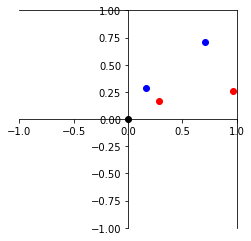

In [30]:
# rotate vector by creating a transformation matrix.
# transformation matrix is generated from a rotation vector.
R = scipy.spatial.transform.Rotation

a = np.pi / 4
b = np.pi / 3
u = np.array([np.cos(b) / 3, np.sin(b)/ 3, 0])
v = np.array([np.cos(a), np.sin(a), 0])
# create a rotate vector cw by 30 matrix
r = R.from_rotvec(np.array([0, 0, -1]) * np.pi / 6).as_matrix()
# matrix multiplication
w = r @ v
z = r @ u
fig, ax = plt.subplots()
ax.scatter(0, 0, color="black")
ax.scatter(u[0],u[1], color="blue")
ax.scatter(v[0],v[1], color="blue")
ax.scatter(z[0],z[1], color="red")
ax.scatter(w[0],w[1], color="red")

# change graph appearance
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_aspect('equal')

[[ 0.70710678  0.70710678  0.        ]
 [-0.16666667  0.28867513  0.        ]
 [ 0.21650635 -0.125       0.        ]]


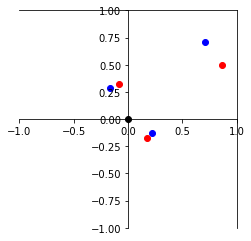

In [44]:
# rotate multiple vectors at once by creating a transformation matrix.
# transformation matrix is generated from a rotation vector.
R = scipy.spatial.transform.Rotation

a = np.pi / 4
b = 2 * np.pi / 3
c = - np.pi / 6
# vectors that we want to rotate in the shape of
# (number of vectors, vector dimensions)
v = np.array([
    [np.cos(a), np.sin(a), 0],
    [np.cos(b) / 3, np.sin(b)/ 3, 0],
    [np.cos(c) / 4, np.sin(c)/ 4, 0]
])
print(v)
# create a rotate vector cw by 30 matrix
r = R.from_rotvec(np.array([0, 0, -1]) * np.pi / 12).as_matrix()
# matrix multiplication: transpose to make vectors in v column vectors.
#     next apply np.matmul (Matrix product of two arrays).
#     finally transpose back vectors in v to row vectors
w = (r @ v.T).T
fig, ax = plt.subplots()
ax.scatter(0, 0, color="black")
ax.scatter(v[:,0],v[:,1], color="blue")
ax.scatter(w[:,0],w[:,1], color="red")

# change graph appearance
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_aspect('equal')

[[ 0.70710678  0.70710678  0.        ]
 [-0.16666667  0.28867513  0.        ]
 [ 0.21650635 -0.125       0.        ]]


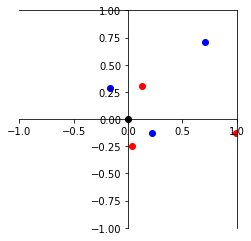

In [76]:
# rotate multiple vectors at once by creating a transformation matrix.
# transformation matrix is generated from a rotation vector.
R = scipy.spatial.transform.Rotation

a = np.pi / 4
b = 2 * np.pi / 3
c = - np.pi / 6
# vectors that we want to rotate in the shape of
# (number of vectors, vector dimensions)
v = np.array([
    [np.cos(a), np.sin(a), 0],
    [np.cos(b) / 3, np.sin(b)/ 3, 0],
    [np.cos(c) / 4, np.sin(c)/ 4, 0]
])
print(v)
# create a rotate vector cw by matrix
angle = (np.random.sample()*2 - 1)*np.pi
r = R.from_rotvec(np.array([0, 0, -1]) * angle).as_matrix()
# matrix multiplication: transpose to make vectors in v column vectors.
#     next apply np.matmul (Matrix product of two arrays).
#     finally transpose back vectors in v to row vectors
w = (r @ v.T).T
fig, ax = plt.subplots()
ax.scatter(0, 0, color="black")
ax.scatter(v[:,0],v[:,1], color="blue")
ax.scatter(w[:,0],w[:,1], color="red")

# change graph appearance
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_aspect('equal')

In [19]:
## example of using 

ids = [
        "Stroma/MMRd/VOA-1000A/512/20/0_0",
        "Stroma/MMRd/VOA-1000A/512/10/0_0",
        "Stroma/MMRd/VOA-1000A/512/20/2_2",
        "Stroma/MMRd/VOA-1000A/256/20/0_0",
        "Stroma/MMRd/VOA-1000A/256/10/0_0",
        "Tumor/POLE/VOA-1000B/256/10/0_0"]

id_nd = np.char.asarray([[*id.split('/'), id] for id in ids])
patch_sizes = np.unique(id_nd[:, 3])
magnifications = np.unique(id_nd[:, 4])

print(id_nd[:, 3])
print(id_nd[:, 3] == '512')
print(id_nd[id_nd[:, 3] == '512', -1])
print(id_nd[id_nd[:, 4] == '10', -1])

['512' '512' '512' '256' '256' '256']
[ True  True  True False False False]
['Stroma/MMRd/VOA-1000A/512/20/0_0' 'Stroma/MMRd/VOA-1000A/512/10/0_0'
 'Stroma/MMRd/VOA-1000A/512/20/2_2']
['Stroma/MMRd/VOA-1000A/512/10/0_0' 'Stroma/MMRd/VOA-1000A/256/10/0_0'
 'Tumor/POLE/VOA-1000B/256/10/0_0']


In [121]:
# example of reshaping an array
A = np.array([
    [
        [0, 1],
        [2, 3],
    ], [
        [4, 5],
        [6, 7],
    ],
])
A = A.reshape((-1,2))
# A

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [30]:
pp = pprint.PrettyPrinter(indent=4)

ids = [
        "Stroma/MMRd/VOA-1000A/512/20/0_0",
        "Stroma/MMRd/VOA-1000A/512/10/0_0",
        "Stroma/MMRd/VOA-1000A/512/20/2_2",
        "Stroma/MMRd/VOA-1000A/256/20/0_0",
        "Stroma/MMRd/VOA-1000A/256/10/0_0",
        "Tumor/POLE/VOA-1000B/256/10/0_0"]
words = ['patch_size', 'magnification']
sample_pattern = {'patch_size': 3, 'magnification': 4}

id_nd = np.char.asarray([[*id.split('/'), id] for id in ids])
word_to_labels = { }
for word in words:
    word_to_labels[word] = np.unique(id_nd[:, sample_pattern[word]])
id_groups = { }
def traverse_words(part_id_nd, idx=0):
    if idx >= len(words):
        return part_id_nd[:, -1].tolist()
    else:
        word = words[idx]
        out = { }
        for label in word_to_labels[word]:
            selector = part_id_nd[:, sample_pattern[word]] == label
            out[label] = traverse_words(
                    part_id_nd[selector, :],
                    idx=idx + 1)
        return out

group_ids = traverse_words(id_nd)
pp.pprint(group_ids)
print( type(group_ids['256']['10'][0]) )

{   '256': {   '10': [   'Stroma/MMRd/VOA-1000A/256/10/0_0',
                         'Tumor/POLE/VOA-1000B/256/10/0_0'],
               '20': ['Stroma/MMRd/VOA-1000A/256/20/0_0']},
    '512': {   '10': ['Stroma/MMRd/VOA-1000A/512/10/0_0'],
               '20': [   'Stroma/MMRd/VOA-1000A/512/20/0_0',
                         'Stroma/MMRd/VOA-1000A/512/20/2_2']}}
<class 'str'>


In [9]:
# how to initialize objects with many parameters.
class TestMe(object):
    def __init__(self, a, b, c=None, **kargs):
        self.a = a
        self.b = b
        self.c = c

tm = TestMe(**{'a': 1, 'b': 2, 'c': 3, 'd': 4})
print(vars(tm))
tm = TestMe(1, **{'b': 2, 'c': 3, 'd': 4})
print(vars(tm))

{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}


In [48]:
## generate splits indices.

def gen_splits(n):
    """Generates group indices for (train, val, test set."""
    v = list(range(n))
    for idx in range(0, len(v) - 1):
        yield tuple(v[:idx] + v[idx + 2:]), (idx,), (idx + 1,)

for train, val, test in gen_splits(6):
    print(train, val, test)


(2, 3, 4, 5) (0,) (1,)
(0, 3, 4, 5) (1,) (2,)
(0, 1, 4, 5) (2,) (3,)
(0, 1, 2, 5) (3,) (4,)
(0, 1, 2, 3) (4,) (5,)


TypeError: list indices must be integers or slices, not list